In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import pandas as pd
import numpy as np

# Linear

In [5]:
# Load The training dataset
train_df = pd.read_csv("https://raw.githubusercontent.com/KeithGalli/neural-nets/master/examples/linear/data/train.csv")
train_df.head()

,x,y,color
0,1.146728,2.233629,0.0
1,3.676886,4.520687,0.0
2,0.730671,1.426260,0.0
3,1.950790,3.145987,0.0
4,4.323010,5.320534,0.0


In [18]:
# Print a summary about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       4000 non-null   float64
 1   y       4000 non-null   float64
 2   color   4000 non-null   float64
dtypes: float64(3)
memory usage: 93.9 KB


In [19]:
# Check Our Target Variable
train_df["color"].unique()

array([0., 1.])

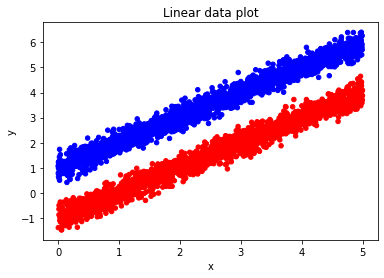

In [17]:
# Plot Our Data To get An Idea of its shape
color = train_df['color'].map({0:"b",1:"r"})
train_df.plot(kind="scatter",x="x",y="y",c=color,title="Linear data plot")

In [25]:
# make sure to shuffle data before fitting it to the mode
# because initially we can see that labels values are nicely separated from each other
# the following methode works in place

np.random.shuffle(train_df.values)

train_df.head()

,x,y,color
0,3.100834,4.250820,0.0
1,1.489418,0.545296,1.0
2,2.234555,2.714779,0.0
3,2.451174,1.577514,1.0
4,4.731559,5.957206,0.0


In [35]:
# Neural Network Model to classify data into 0 or 1 ( bleu or red)
# Input layer consists of 2 neurons x and y
# One hidden layer of 4 neurons using RELU as an activation function

model = keras.Sequential([
        keras.layers.Dense(12,input_shape=(2,),activation="relu"),
        keras.layers.Dense(2,activation="softmax")
])

# Using the adam optimizer
# and the cross entropy as a loss function

model.compile(optimizer="adam",
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

# fit the training data
model.fit(train_df[["x","y"]].values,train_df['color'].values,batch_size=4,epochs=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1000/1000 [==============================] - 2s 2ms/step - loss: 0.1769 - accuracy: 0.9772
Epoch 2/5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0131 - accuracy: 1.0000
Epoch 3/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 4/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 5/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0014 - accuracy: 1.0000


In [36]:
# Load The test dataset
test_df = pd.read_csv("https://raw.githubusercontent.com/KeithGalli/neural-nets/master/examples/linear/data/test.csv")
test_df.head()

,x,y,color
0,2.684292,3.867108,0.0
1,2.707883,4.002614,0.0
2,2.705905,3.859686,0.0
3,4.536191,5.240051,0.0
4,3.656068,4.461771,0.0


In [38]:
# Print a summary about the dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
 2   color   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [39]:
# Check Our Target Variable
test_df["color"].unique()

array([0., 1.])

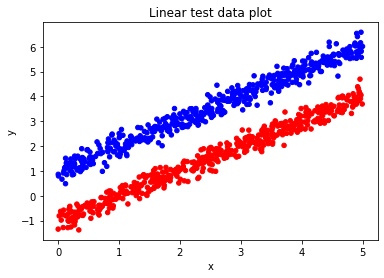

In [41]:
# Plot Our Data To get An Idea of its shape
color = test_df['color'].map({0:"b",1:"r"})
test_df.plot(kind="scatter",x="x",y="y",c=color,title="Linear test data plot")

In [42]:
# evaluate the model
model.evaluate(test_df[["x","y"]].values,test_df['color'].values)

32/32 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


[0.0010867482051253319, 1.0]